In [1]:
%%capture
!pip install folium matplotlib mapclassify

In [2]:
import pandas as pd
import geopandas as gpd
import os
import zipfile

FOLDER_PATH = '/content/drive/MyDrive/DSL SMART CITIES'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import NILs

In [4]:
nil = gpd.read_file(os.path.join(FOLDER_PATH, 'Processed','nil.geojson'))
nil = nil.to_crs(epsg=4326)
nil = nil.dissolve()[['geometry']]
nil.explore()

# Preprocessing

In [5]:
osm_zipfile = os.path.join(FOLDER_PATH, 'nord-ovest-latest-free.shp.zip')

file_list = ['gis_osm_pois_free_1',
             'gis_osm_landuse_a_free_1',
             'gis_osm_pofw_free_1',
             'gis_osm_transport_free_1',
             'gis_osm_roads_free_1',
             'gis_osm_traffic_a_free_1']

exts = ['shp', 'cpg', 'dbf', 'prj', 'shx']

with zipfile.ZipFile(osm_zipfile, 'r') as zip_ref:
    for file in file_list:
        print('Processing: ', file)
        gdf = gpd.read_file(f"zip://{osm_zipfile}!{file}.shp", encoding='utf-8')
        gdf['geometry_temp'] = gdf['geometry']
        gdf = nil.sjoin(gdf, how='left').drop(columns=['geometry'])
        gdf = gdf.rename(columns={'geometry_temp':'geometry'}).drop('index_right', axis=1)
        gdf = gdf.set_geometry('geometry')
        print('Saving')
        output_path= FOLDER_PATH + '/Processed/' + file + '.shp'
        gdf.to_file(output_path, encoding='utf-8')

Processing:  gis_osm_pois_free_1
Index(['osm_id', 'code', 'fclass', 'name', 'geometry'], dtype='object')
Saving
Processing:  gis_osm_landuse_a_free_1
Index(['osm_id', 'code', 'fclass', 'name', 'geometry'], dtype='object')
Saving
Processing:  gis_osm_pofw_free_1
Index(['osm_id', 'code', 'fclass', 'name', 'geometry'], dtype='object')
Saving
Processing:  gis_osm_transport_free_1
Index(['osm_id', 'code', 'fclass', 'name', 'geometry'], dtype='object')
Saving
Processing:  gis_osm_roads_free_1
Index(['osm_id', 'code', 'fclass', 'name', 'ref', 'oneway', 'maxspeed',
       'layer', 'bridge', 'tunnel', 'geometry'],
      dtype='object')
Saving
Processing:  gis_osm_traffic_a_free_1
Index(['osm_id', 'code', 'fclass', 'name', 'geometry'], dtype='object')
Saving


#Check

In [7]:
traffic = gpd.read_file(os.path.join(FOLDER_PATH, 'Processed', 'OSM','gis_osm_traffic_a_free_1.shp'))
traffic.shape

(2167, 5)

gis_osm_pois_free_1
gis_osm_landuse_a_free_1
gis_osm_pofw_free_1
gis_osm_transport_free_1
gis_osm_roads_free_1
gis_osm_traffic_a_free_1


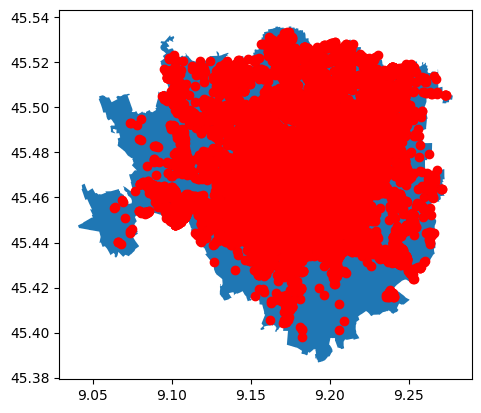

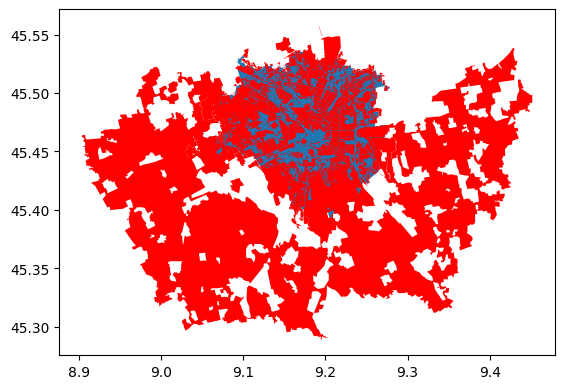

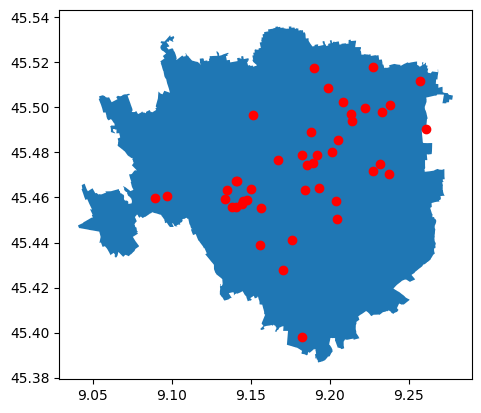

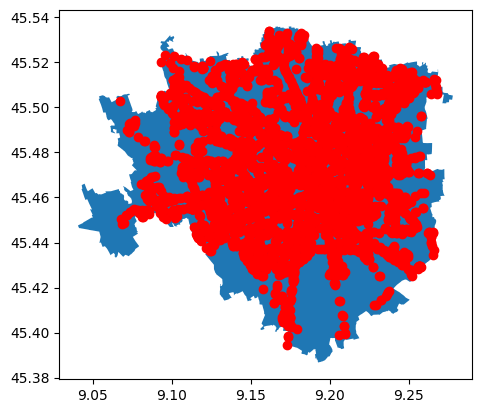

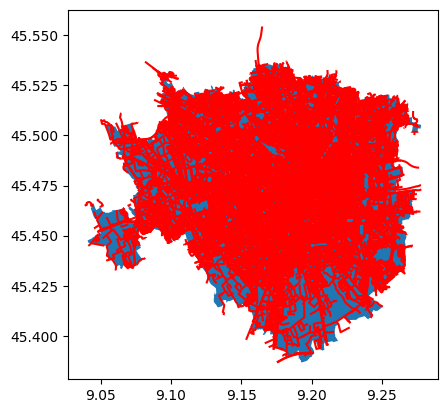

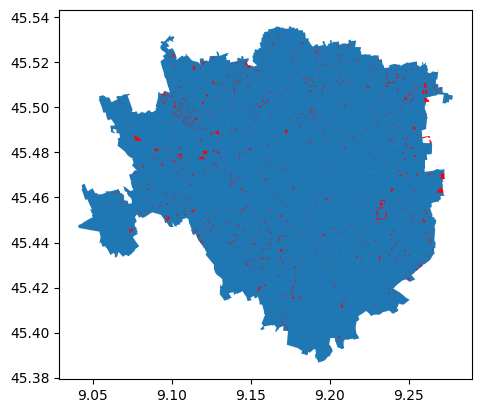

In [8]:
import matplotlib.pyplot as plt

for file in file_list:
    print(file)
    gdf = gpd.read_file(os.path.join(FOLDER_PATH, 'Processed', 'OSM', file + '.shp'))
    fig, ax = plt.subplots()
    nil.plot(ax=ax)
    gdf.plot(ax=ax,color='red')